In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 10
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'':
  os.chdir(r'')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


C:\Users\kerry\AppData\Local\Temp\ipykernel_12612\3609341226.py:20: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



{"C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\importlib\\_bootstrap.py": 1647454514.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\importlib\\_bootstrap_external.py": 1647454514.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\codecs.py": 1647454514.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\aliases.py": 1647454514.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\__init__.py": 1647454514.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\utf_8.py": 1647454514.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\cp1252.py": 1647454514.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\abc.py": 1647454514.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\io.py": 1647454514.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\li

C:\Users\kerry\AppData\Local\Temp\ipykernel_12612\1540463722.py:69: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



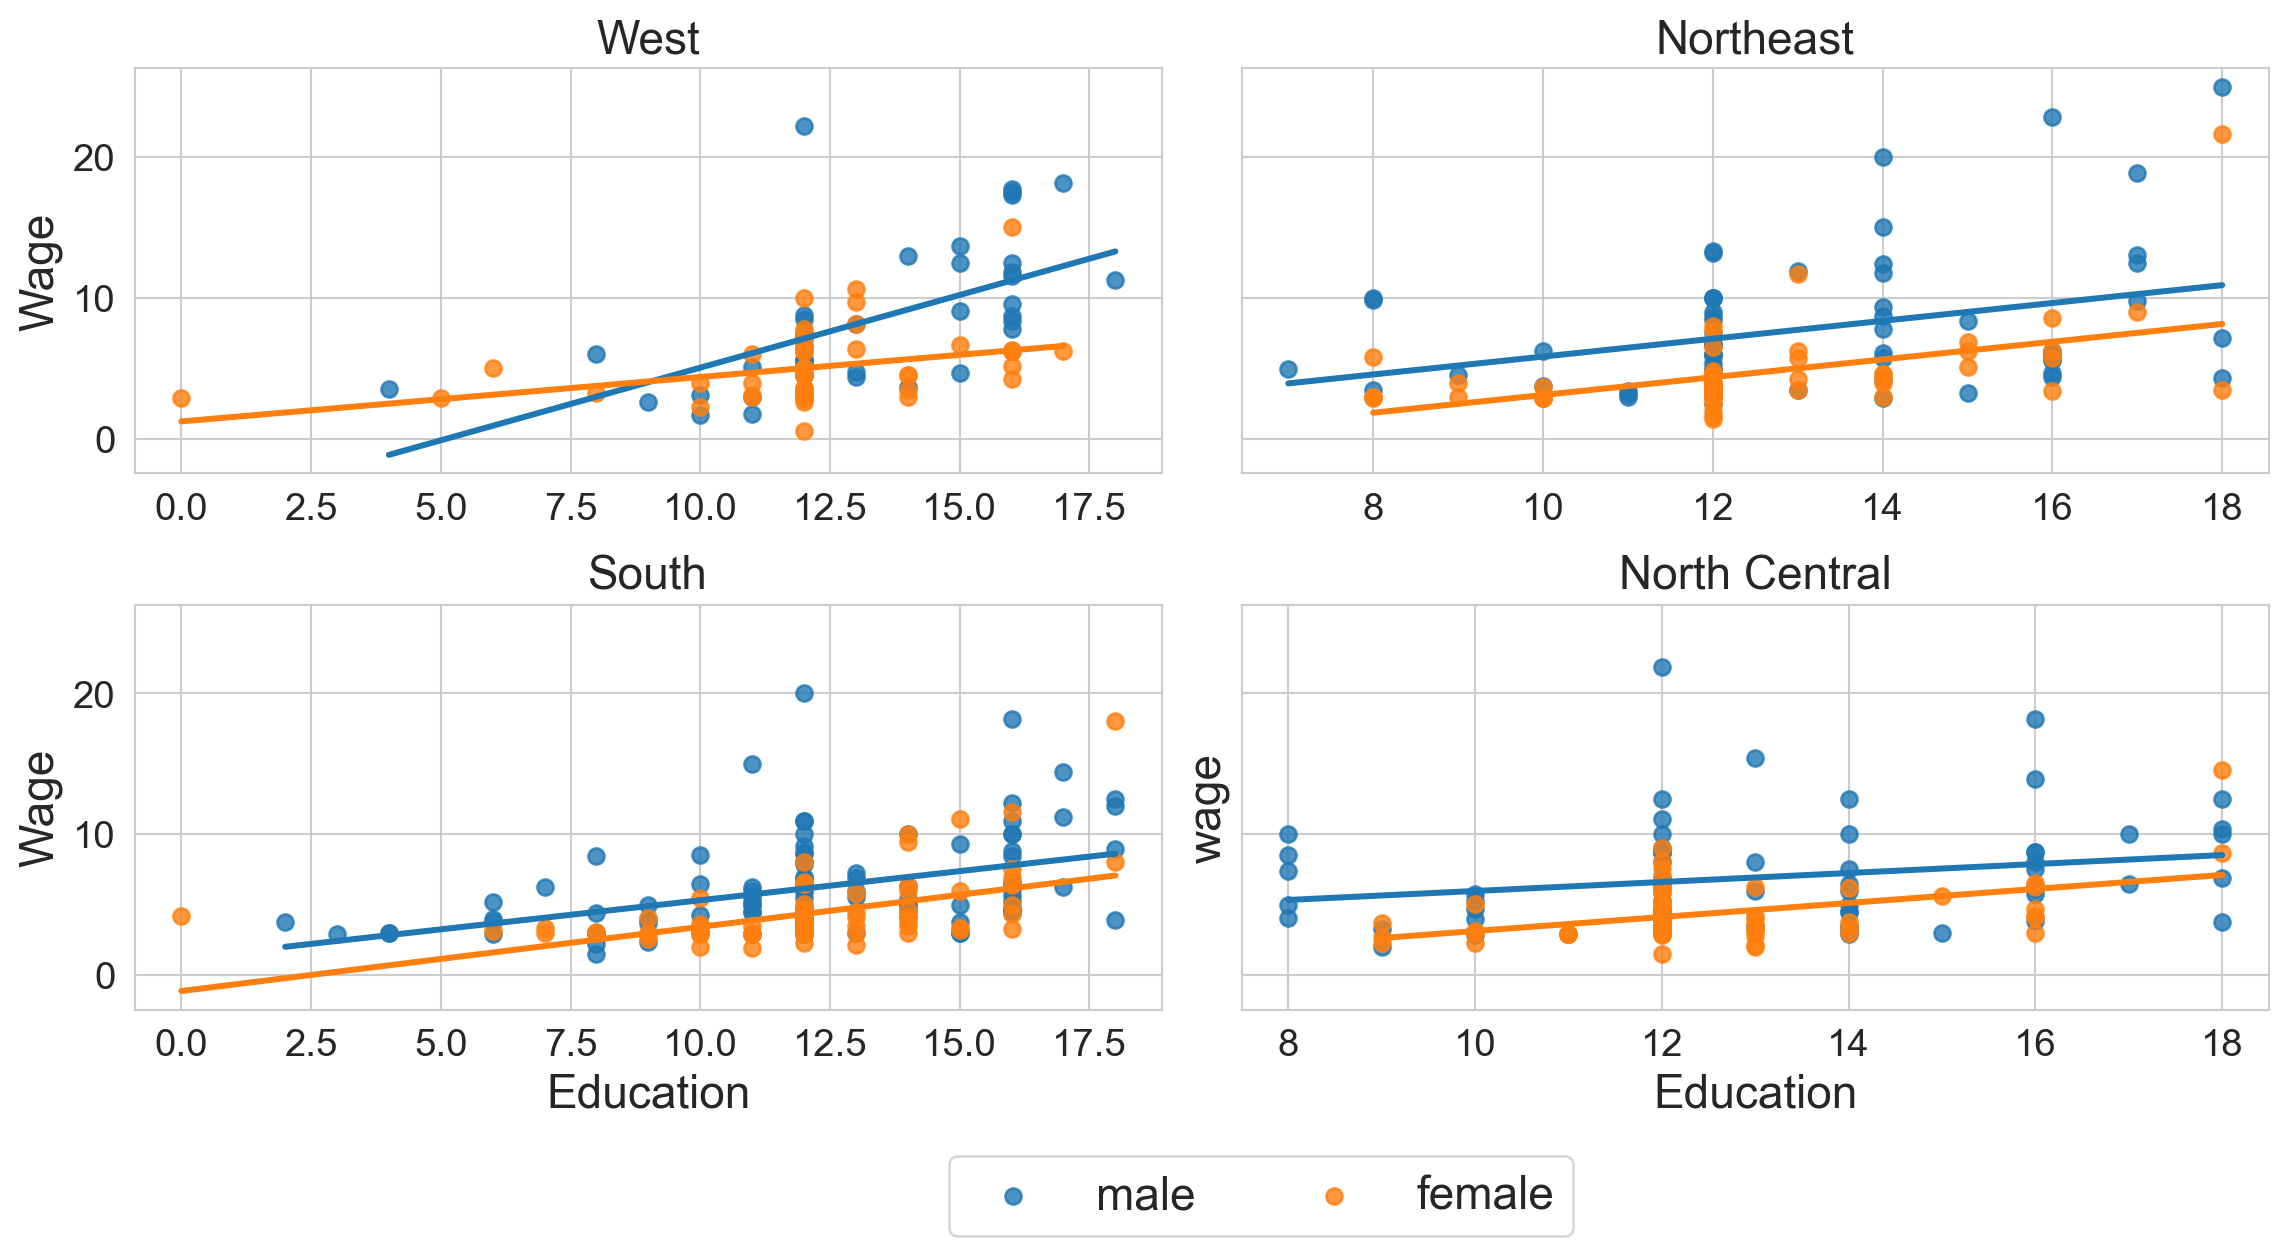

In [2]:
#| fig-align: center

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
    
url = urlopen("https://www.cengage.com/aise/economics/wooldridge_3e_datasets/statafiles.zip")

with ZipFile(BytesIO(url.read())) as zipped:
    file = zipped.open("WAGE1.DTA")
stata = pd.read_stata(file, iterator=True)
wages = stata.read()

wages['area'] = 0
for i, col in enumerate(['northcen', 'south', 'west']):
    wages['area'] += (i+1) * wages[col]
wages['area'] = wages.area.map({0: 'Northeast', 1: 'North Central', 2: 'South', 3: 'West'})

occupations = wages.columns.to_list()[12:18] 
wages['occup'] = 0
for i, col in enumerate(occupations):
    wages['occup'] += (i+1) * wages[col]
dct = {0: 'other'}
dct.update({(i+1): occupations[i] for i in range(6)})
wages['occup'] = wages.occup.map(dct)

occup_cats = ['profocc', 'servocc', 'clerocc']
wages['occup_cat'] = 0
for i, col in enumerate(occup_cats):
    wages['occup_cat'] += (i+1) * wages[col]
dct = {0: 'other'}
dct.update({(i+1): occup_cats[i] for i in range(3)})
wages['occup_cat'] = wages.occup_cat.map(dct)


sns.set_style('whitegrid')
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['axes.titlesize'] = 'xx-large'
mpl.rcParams['axes.labelsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['ytick.labelsize'] = 'x-large'

fig, axes = plt.subplots(2, 2, sharey=True, figsize=(12, 6))
(ax1, ax2), (ax3, ax4) = axes
for area, ax in zip(wages.area.unique(), (ax1, ax2, ax3, ax4)):
    for gender in [0, 1]:
        sns.regplot(
            data=wages[(wages.area==area) & (wages.female==gender)], 
            x="educ", 
            y="wage", 
            label=("female" if gender==1 else "male") if ax==ax1 else "",
            ci=None, 
            ax=ax
        )
    ax.set_title(area)
ax1.set_xlabel("")
ax1.set_ylabel("Wage")
ax2.set_xlabel("")
ax2.set_ylabel("")
ax3.set_xlabel("Education")
ax3.set_ylabel("Wage")
ax4.set_xlabel("Education")
fig.legend(bbox_to_anchor=(0.55, -0.1), loc='lower center', ncol=2)
fig.tight_layout()  
fig.show()

In [3]:
import pandas as pd
from pystout import pystout
import statsmodels.formula.api as smf
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


wages = pd.read_csv("wages.csv")

mod0 = smf.ols(
    "wage ~ educ+exper+tenure",
    data=wages
    )
mod1 = smf.ols(
    "wage ~ educ+exper+tenure+female",
    data=wages
    )

mod2 = smf.ols(
    "wage ~ educ+exper+tenure+female+nonwhite",
    data=wages
    )

mod3 = smf.ols(
    "wage ~ educ+exper+tenure+female+nonwhite+married", 
    data=wages
    )

_ = pystout(
    models=[mod.fit(cov_type="HC3") for mod in [mod0, mod1, mod2, mod3]],
    file="table1.tex",
       exogvars=[
        'educ', 
        'exper', 
        'tenure', 
        'female', 
        'nonwhite', 
        'married',
        ],
    stars={0.1: "*", 0.05: "**", 0.01: "***"},
    addnotes=[
        "$^*p<0.1$, $^{**}p<0.05$, $^{***}p<0.01$",
        ],
    modstat={"nobs": "Obs", "rsquared_adj": "Adj $R^2$"},
)